In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('cpi.csv')
df = df[df['Year'] != 2003]
df.Year = pd.to_datetime(df.Year, format='%Y').dt.year
df

,Year,yoy_General,yoy_FoodNonalc,yoy_AlcTobacco,yoy_ClothFootwear,yoy_HouseWaterElcGas,yoy_FurnishHouseEqpt,yoy_Health,yoy_Transport,yoy_Communications,yoy_Recreationandculture,yoy_Education,yoy_Hotelscafesandrestaurants,yoy_Miscellaneous,yoy_Food,yoy_NonalcBvrgs,yoy_Alcoholicbeverages,yoy_Tobacco,yoy_Clothing,yoy_Footwear,yoy_ActualRentals,yoy_MaintRepairDw,yoy_WaterSupplyMisc,yoy_ElecGasOtherFuels,yoy_FurnitureCarpet,yoy_Householdtextiles,yoy_Householdappliances,yoy_GlassTableUtensil,yoy_HouseGardenEqpt,yoy_GoodServiceHouse,yoy_Medical,yoy_Outpatientservices,yoy_Hospitalservices,yoy_Purchaseofvehicles,yoy_OprPersonalTrans,yoy_Transportservices,yoy_Postalservices,yoy_TelephoneFaxEqpt,yoy_TelephoneFaxService,yoy_AudioVisualEqpt,...,yoy_Othermedicalproducts,yoy_TherapeuticEqpt,yoy_Medicalservices,yoy_Dentalservices,yoy_Paramedicalservices,yoy_Motorcars,yoy_Motorcycles,yoy_Bicycles,yoy_PersonalTransportEqpt,yoy_FuelsForPersonalTransEqpt,yoy_RepairPersonalTransEqpt,yoy_PersonalTransEqptOther,yoy_RailwayTransport,yoy_RoadTransport,yoy_AirTransport,yoy_WaterTransport,yoy_OtherTransport,yoy_SoundPictureEqpt,yoy_InfoProcessEqpt,yoy_AudioVisualEqptRepair,yoy_MusicandIndoor,yoy_Gamestoysandhobbies,yoy_SportCampingEqpt,yoy_PetEqpt,yoy_VetServices,yoy_SportingServices,yoy_Culturalservices,yoy_Gamesofchance,yoy_Books,yoy_NewspapersPeriodicals,yoy_DrawingMtrl,yoy_Hairdressing,yoy_ElecApplPersonal,yoy_PersonalCareOther,yoy_Jewellery,yoy_Otherpersonaleffects,yoy_DwellingInsurance,yoy_HealthInsurance,yoy_TransportInsurance,yoy_OtherFinancialServices
1,2004,8.603375,6.870654,19.760845,6.641002,8.410600,6.045960,8.098699,7.303930,3.222408,8.868892,19.426870,16.782408,10.214545,6.660062,9.890405,29.573814,19.040403,6.128928,8.095372,21.096182,6.041559,7.423889,3.320052,14.725689,8.417631,-7.564282,11.732500,9.829304,3.548795,-6.939493,22.853821,16.382975,2.058025,9.084577,9.733184,12.744200,-14.153283,4.958112,-4.328146,...,12.057739,3.991735,38.213169,16.914627,-2.764820,2.227511,NaN,-6.727424,5.112089,8.696679,14.349545,18.669750,12.738176,10.648709,-14.802678,-12.427279,18.328857,-15.520943,9.531657,42.240406,11.789377,13.485129,11.782108,NaN,16.293659,16.146137,15.447699,14.586130,24.257540,15.053617,10.281139,22.481659,0.558257,3.788629,6.975466,15.547221,17.190300,23.156666,18.283333,14.026667
2,2005,8.190269,4.930400,13.448942,3.589197,10.685547,7.205953,4.360283,15.363782,1.663886,7.537895,13.636430,14.342873,6.807124,4.776211,7.140060,23.655241,12.703559,2.475279,6.738091,19.189135,9.007936,-1.599728,10.836533,13.735889,1.422190,5.335212,5.267532,7.902674,3.543255,-0.218239,5.803570,18.502874,0.463132,23.222502,18.514753,8.861692,4.479748,1.477399,1.564495,...,6.877614,4.858892,14.316545,0.741633,-7.445812,0.224273,NaN,12.651396,5.886232,25.325769,14.024783,13.154632,16.390242,19.150747,5.403307,3.249895,19.889786,3.912716,-4.680555,-2.086058,3.494519,10.654358,5.199295,NaN,12.249919,21.665024,3.978524,43.468513,12.612655,-6.033419,2.988893,17.169806,1.872075,4.225729,2.656116,10.923888,12.452971,-6.320298,8.136617,13.692938
3,2006,9.587143,9.702835,22.011423,-0.153758,12.619371,5.597675,3.853451,10.263268,2.608184,4.963588,7.769452,13.929853,16.451099,9.853780,7.481184,6.076422,23.369987,-0.453978,0.551197,20.116879,6.862180,6.449776,11.503958,4.676849,0.885664,4.355826,5.596089,6.570561,9.373922,-3.449667,9.089489,9.990356,8.539770,10.771388,10.783460,1.110803,-4.918096,3.615826,-3.662764,...,2.820968,-0.069689,10.756428,14.242446,1.112402,8.838810,NaN,-3.628615,9.504980,10.412263,15.459799,10.388786,6.417784,10.990906,2.098904,20.203444,16.443754,-3.955667,-2.873490,3.330476,4.036398,15.587384,1.329556,NaN,6.488799,14.380300,4.442883,-5.982608,19.224691,7.801901,4.283319,9.890927,1.572443,1.987386,44.469280,6.533848,28.438232,-3.155617,7.395129,15.155983
4,2007,8.783520,12.423841,9.919018,4.486614,11.264974,7.710110,4.833150,5.718038,-0.834241,3.837775,7.228254,11.232869,5.687397,12.684458,8.492722,7.066960,10.105796,3.371443,7.89079

In [ ]:
cpi_dict = {}
id = 1
columns = df.columns.values.tolist()[2:]
for year in df.Year:
  cpi_dict[year] = []
  for cat in columns:
    if df.loc[id].at[cat] > 10:
      cpi_dict[year].append(cat[4:])
  id+=1

cpi_dict

{2004: ['AlcTobacco',
  'Education',
  'Hotelscafesandrestaurants',
  'Miscellaneous',
  'Alcoholicbeverages',
  'Tobacco',
  'ActualRentals',
  'FurnitureCarpet',
  'GlassTableUtensil',
  'Outpatientservices',
  'Hospitalservices',
  'Postalservices',
  'CultureOther',
  'GardenPetEqptOther',
  'RecreationalCulture',
  'NewspaperBooks',
  'PreprimPrimEduc',
  'Secondaryeducation',
  'Tertiaryeducation',
  'EducNoLevel',
  'Cateringservices',
  'Accommodationservices',
  'Socialprotection',
  'insurance',
  'Financialservicesnec',
  'Otherservicesnec',
  'Fishandseafood',
  'Milkcheeseandeggs',
  'Sweets',
  'Foodproductsnec',
  'Coffeeteaandcocoa',
  'Spirits',
  'Wine',
  'Beer',
  'ClothingCleanRepair',
  'FootwearRepair',
  'ActualRentalsTenants',
  'Solidfuels',
  'Furniture',
  'FloorCovering',
  'HouseholdApplRepair',
  'DomesticServices',
  'Othermedicalproducts',
  'Medicalservices',
  'Dentalservices',
  'RepairPersonalTransEqpt',
  'PersonalTransEqptOther',
  'RailwayTranspo

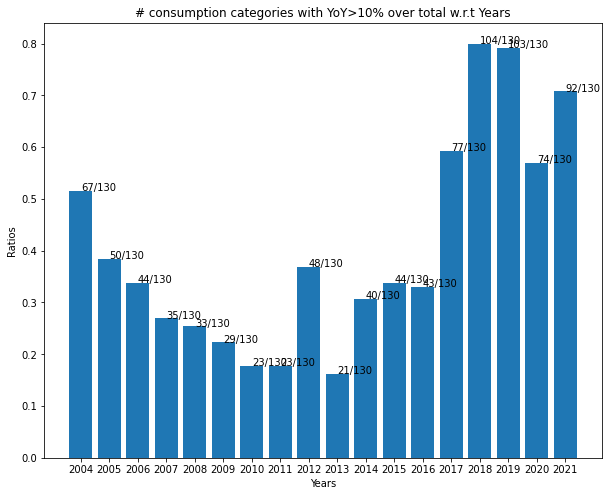

In [ ]:
import matplotlib.pyplot as plt
from fractions import Fraction
total = 130
years = df.Year.to_list()
ratios = [len(cpi_dict[year])/total for year in years]
y_ticks = [str(len(cpi_dict[year]))+'/'+str(total) for year in years]
plt.figure(figsize=(10,8))
plt.bar(years,ratios)
for i, txt in enumerate(y_ticks):
    plt.annotate(txt, (years[i], ratios[i]))
plt.xticks(years)
plt.title("# consumption categories with YoY>10% over total w.r.t Years")
plt.xlabel("Years")
plt.ylabel("Ratios")
plt.show()